In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime

In [2]:
# import seaborn and matplotlib for charting and data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [3]:
#import plotly and cufflinks for interactive visualisations
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
# To import csv file containing fundamental data downloaded from S&P Capital IQ, as well as other features and the labels for machine learning.
stockdata = pd.read_csv('cleaned stockdata.csv', index_col=0)

In [5]:
stockdata=pd.get_dummies(data=stockdata, columns=['Sector', 'Country.1','IQ_AUDITOR_OPINION'], drop_first=True, dummy_na=True).drop(['Country.1_nan','IQ_AUDITOR_OPINION_nan'],axis=1)

In [6]:
#To create a categorical variable based on effective annual return.
stockdata['Positive or negative returns'] = [1 if x >= 0 else 0 for x in stockdata['Effective annual return']]

# K Nearest Neighbors

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(stockdata.drop(['Symbol','longName','Name','IPO Year','Effective annual return','CIQ ID', 'Ticker', 'Short Business Description','Positive or negative returns'],axis=1), 
                                                    stockdata['Positive or negative returns'], test_size=0.30, 
                                                    random_state=101)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_features=scaler.transform(X_train)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(scaled_features,y_train)

KNeighborsClassifier(n_neighbors=1)

In [10]:
predictions = knn.predict(scaler.transform(X_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.49      0.46      0.48       205
           1       0.83      0.85      0.84       647

    accuracy                           0.76       852
   macro avg       0.66      0.66      0.66       852
weighted avg       0.75      0.76      0.75       852



In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[ 95, 110],
       [ 98, 549]], dtype=int64)

In [13]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_features,y_train)
    predictions_i = knn.predict(scaler.transform(X_test))
    error_rate.append(np.mean(predictions_i != y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:

Text(0, 0.5, 'Error Rate')

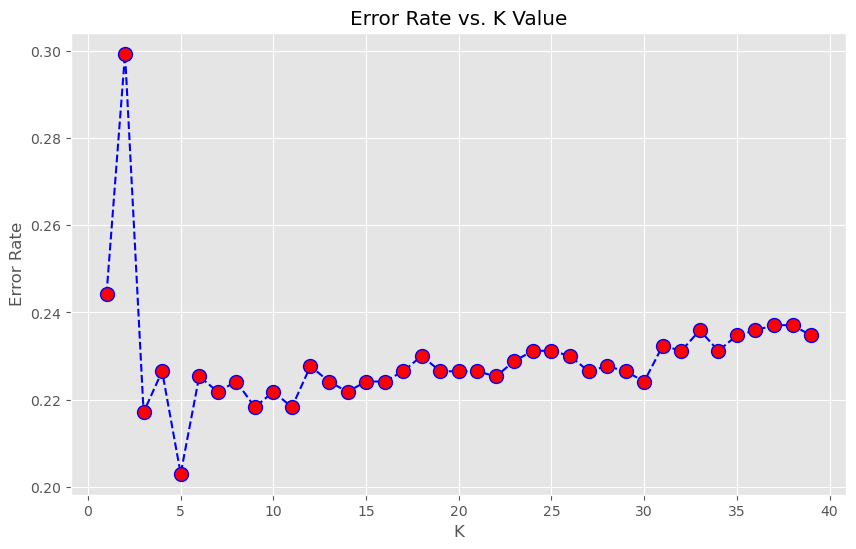

In [14]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Based on the error rate chart, the lowest error is when K=5.

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(stockdata.drop(['Symbol','longName','Name','IPO Year','Effective annual return','CIQ ID', 'Ticker', 'Short Business Description','Positive or negative returns'],axis=1), 
                                                    stockdata['Positive or negative returns'], test_size=0.30, 
                                                    random_state=101)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_features=scaler.transform(X_train)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scaled_features,y_train)

KNeighborsClassifier()

In [18]:
predictions = knn.predict(scaler.transform(X_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.62      0.40      0.48       205
           1       0.83      0.92      0.87       647

    accuracy                           0.80       852
   macro avg       0.73      0.66      0.68       852
weighted avg       0.78      0.80      0.78       852



In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[ 81, 124],
       [ 49, 598]], dtype=int64)

Intuitively, K Nearest Neighbors might not work well with a mix of categorical and numerical features. Therefore, we will remove all categorical features i.e. Country.1 dummy variables, Sector dummy variables and IQ_AUDITOR OPINION dummy variables. 

In [21]:
#Remove all dummy variables.
X_train, X_test, y_train, y_test = train_test_split(stockdata.iloc[:,8:36], 
                                                    stockdata['Positive or negative returns'], test_size=0.30, 
                                                    random_state=101)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_features=scaler.transform(X_train)

In [23]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_features,y_train)
    predictions_i = knn.predict(scaler.transform(X_test))
    error_rate.append(np.mean(predictions_i != y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:

Text(0, 0.5, 'Error Rate')

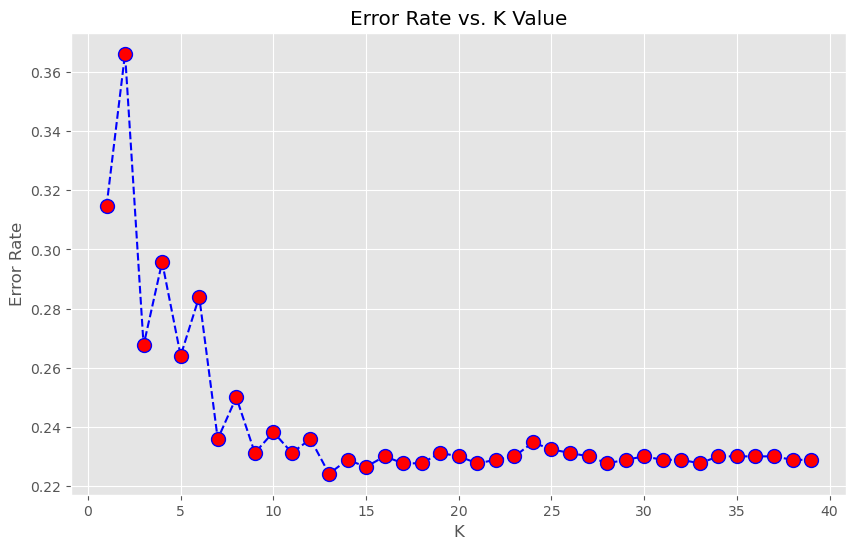

In [24]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [25]:
X_train, X_test, y_train, y_test = train_test_split(stockdata.iloc[:,8:36], 
                                                    stockdata['Positive or negative returns'], test_size=0.30, 
                                                    random_state=101)

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_features=scaler.transform(X_train)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(scaled_features,y_train)

KNeighborsClassifier(n_neighbors=13)

In [28]:
predictions = knn.predict(scaler.transform(X_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.66      0.14      0.23       205
           1       0.78      0.98      0.87       647

    accuracy                           0.78       852
   macro avg       0.72      0.56      0.55       852
weighted avg       0.75      0.78      0.72       852



In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[ 29, 176],
       [ 15, 632]], dtype=int64)

The model did not perform as well as when all dummy variables were used.

In [31]:
#Remove the dummy variables for Country.1 except for Country.1_United States
X_train, X_test, y_train, y_test = train_test_split(pd.concat([stockdata.iloc[:,8:48],stockdata['Country.1_United States'],stockdata.iloc[:,95:99]],axis=1), 
                                                    stockdata['Positive or negative returns'], test_size=0.30, 
                                                    random_state=101)

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_features=scaler.transform(X_train)

In [33]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_features,y_train)
    predictions_i = knn.predict(scaler.transform(X_test))
    error_rate.append(np.mean(predictions_i != y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



Text(0, 0.5, 'Error Rate')

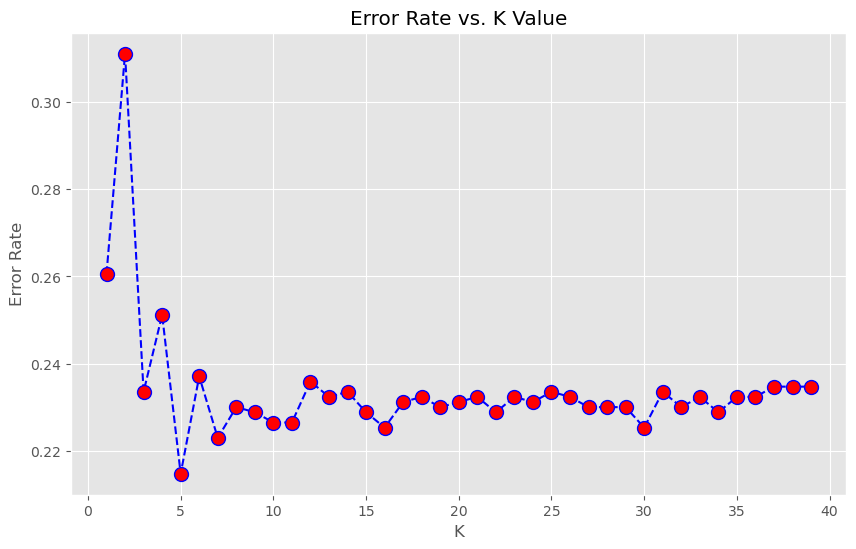

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [35]:
X_train, X_test, y_train, y_test = train_test_split(pd.concat([stockdata.iloc[:,8:48],stockdata['Country.1_United States'],stockdata.iloc[:,95:99]],axis=1), 
                                                    stockdata['Positive or negative returns'], test_size=0.30, 
                                                    random_state=101)

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_features=scaler.transform(X_train)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scaled_features,y_train)

KNeighborsClassifier()

In [38]:
predictions = knn.predict(scaler.transform(X_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.58      0.38      0.46       205
           1       0.82      0.91      0.87       647

    accuracy                           0.79       852
   macro avg       0.70      0.65      0.66       852
weighted avg       0.76      0.79      0.77       852



In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[ 77, 128],
       [ 55, 592]], dtype=int64)

The model seems to perform best with all dummy variables. No further feature selection is performed.

**K Nearest Neighbors model metrics**

|**Features**|**Accuracy**|**Weight avg f1-score**|
|---------------------------|-----|---|
|K=1, with all 91 features including all dummy variables|0.76|0.75|
|K=5, with all 91 features including all dummy variables|**0.80**|**0.78**|
|K=13, with all dummy variables removed (28 features)|0.78|0.72|
|K=5, with Country.1 dummy variables removed except Country.1_United States (45 features)|0.79|0.77|